In [51]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import gridspec
import math

In [52]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel, AuthorTopicModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
from torch.autograd import Variable
from collections import Counter
from torchtext.vocab import Vocab

In [53]:
#import WEIS data
WEIS = pd.read_csv('../../WEIS/weis_data_decoded.csv')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/liam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
def prepare_text(data=WEIS, column='text') :
    text_raw = data[column].copy()
    en_stop_words = set(stopwords.words('english'))
    
    #remove stopwords
    text_prep = text_raw.apply(lambda row: ' '.join([word for word in row.split() if (not word in en_stop_words)]))
    
    #tokenize each newspaper title
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
    text_prep = text_prep.apply(lambda row: tokenizer.tokenize(row))
    
    return text_prep

In [55]:
tokenized = prepare_text()

In [56]:
is_cuda = torch.cuda.is_available()
print("Cuda Status on system is {}".format(is_cuda))

Cuda Status on system is False


In [7]:
# create Bag of Words indexing
# word_to_ix = {}
# for lst in tokenized:
#     for word in lst:
#         if word not in word_to_ix:
#             word_to_ix[word] = len(word_to_ix)
#
# VOCAB_SZE = len(word_to_ix)
#

In [8]:
# def make_bow_vector(title, dct=word_to_ix):
#     vec = torch.zeros(VOCAB_SZE)
#     for word in title:
#         vec[dct[word]] += 1
#     return vec.view(1, -1)
#
# def create_bow(tokens=tokenized):
#     mat = torch.zeros(tokenized.shape[0], VOCAB_SZE)
#     v = 0
#     for title in tokens:
#         x = make_bow_vector(title)
#         mat[v] = x
#         v += 1
#         #first used torch.cat: very expensive!!
#     return mat
#

In [9]:
#takes about a minute
# ready_text = create_bow(tokenized)

In [10]:
#create dictionary
# id2word = Dictionary(tokenized)

In [11]:
#create bow_representation of tweets
# titles_bow = [id2word.doc2bow(tweet) for tweet in tokenized]

In [12]:
# vocab_tf= [0] * id2word.num_pos
# for i in titles_bow:
#     for item,count in dict(i).items():
#             vocab_tf[item]+=count
# def freq(item):
#     #item_id = id2word.token2id(item)
#     return vocab_tf[item]
# ids= [*range(0,id2word.num_pos)]
# ids.sort(key=freq, reverse=True)
# filter_ids = ids[0:10] + ids[len(ids)-25:len(ids)]
# id2word.filter_tokens(bad_ids=filter_ids)
# titles_bow = [id2word.doc2bow(tweet) for tweet in tokenized]

In [13]:
# author2doc = {}
# for  index in range(len(WEIS['actor_abbrev'])):
#     country = WEIS['actor_abbrev'].iloc[index]
#     if country in author2doc:
#         author2doc[country] = author2doc[country] + [index]
#     else:
#         author2doc[country] = [index]

In [14]:
#compute coherence to get optimal amounts of topics k
#
# coherence = []
# for nb_topics in range(1,36):
#     lda = LdaModel(titles_bow, num_topics = nb_topics, id2word = id2word, passes=3)
#     cohm = CoherenceModel(model=lda, corpus=titles_bow, dictionary=id2word, coherence='u_mass')
#     coh = cohm.get_coherence()
#     coherence.append(coh)
#
# # visualize coherence
# plt.figure(figsize=(10,5))
# plt.plot(range(1,36),coherence)
# plt.xlabel("Number of Topics")
# plt.ylabel("Coherence Score");

In [15]:
# k = 10
# #titles_lda = LdaModel(titles_bow, num_topics = k, id2word = id2word, passes=10)
# titles_atm = AuthorTopicModel(titles_bow, num_topics = k, author2doc=author2doc, id2word = id2word, passes=10)

In [16]:
# def plot_top_words(lda=titles_lda, nr_topics=k, nr_words=10):
#     top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
#     top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
#
#     gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
#     gs.update(wspace=0.5, hspace=0.5)
#     plt.figure(figsize=(20,15))
#     for i in range(nr_topics):
#         ax = plt.subplot(gs[i])
#         plt.barh(range(nr_words), top_betas[i][:nr_words], align='center',color='blue', ecolor='black')
#         ax.invert_yaxis()
#         ax.set_yticks(range(nr_words))
#         ax.set_yticklabels(top_words[i][:nr_words])
#         plt.title("Topic "+str(i))
#
#
# plot_top_words()

In [17]:
# counter = Counter()
#
# for title in tokenized:
#     counter.update(title)
# vocab = Vocab(counter, min_freq=1)

In [18]:
# counter2 = Counter()
# for country in WEIS['actor_abbrev']:
#     counter.update(country)
# for country in WEIS['target_abbrev']:
#     counter.update(country)
# vocab2 = Vocab(counter, min_freq=1)

In [19]:
#datapoints = [(tokenized[index], WEIS['goldstein'][index]) for index in range(len(tokenized))]
# datapoints = [(tokenized[index], WEIS['actor_abbrev'][index]) for index in range(len(tokenized))]

In [20]:
# text_pipeline = lambda x: [vocab[token] for token in x]
# label_pipeline = lambda x: [vocab2[token] for token in x]

In [21]:
# from torch.utils.data import DataLoader
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#
# def collate_batch(batch):
#     label_list, text_list, offsets = [], [], [0]
#     for (_text, _label) in batch:
#          label_list.append(label_pipeline(_label))
#          processed_text = torch.tensor(embedding_glove[_text], dtype=torch.int64)
#          text_list.append(processed_text)
#          offsets.append(processed_text.size(0))
#     label_list = torch.tensor(label_list, dtype=torch.float64)
#     label_list = label_list.view(1, -1)
#     offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
#     text_list = torch.cat(text_list)
#     text_list = text_list.view(1, -1)
#     return label_list.to(device), text_list.to(device), offsets.to(device)
#
# dataloader = DataLoader(datapoints, batch_size=8, shuffle=False, collate_fn=collate_batch)
#

In [22]:
# class linearRegression(torch.nn.Module):
#     def __init__(self, inputSize, outputSize, vocab_size):
#         super(linearRegression, self).__init__()
#         # self.embedding = nn.EmbeddingBag(vocab_size, inputSize, sparse=True)
#         self.linear = torch.nn.Linear(inputSize, outputSize)
#
#     def forward(self, x):
#         # embedded = self.embedding(x)
#         #plot the shape
#         out = self.linear(x)
#         return out

In [23]:
# inputDim = 300     # takes variable 'x'
# outputDim = 1       # takes variable 'y'
# learningRate = 0.01
# epochs = 100
#
# model = linearRegression(inputDim, outputDim, len(embedding_glove)).double()
# ##### For GPU #######
# if torch.cuda.is_available():
#     model.cuda()
#

In [24]:
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
#

In [25]:
# goldstein = WEIS['goldstein'].tolist()

In [26]:
# def to_bow(tuples=titles_bow, dict_size=len(id2word)):
#     vector = []
#     for title in tuples:
#         bow = [0]*dict_size
#         for tup in title:
#             bow[tup[0]] = tup[1]
#         vector.append(bow)
#     return vector
# train_data = to_bow()
#

In [27]:
# x_train = datapoints[0:len(datapoints)*8//10]
# x_test = datapoints[len(datapoints)*8//10:len(datapoints)]
# y_train = goldstein[0:len(goldstein)*8//10]
# y_test = goldstein[len(goldstein)*8//10:len(goldstein)]
#

In [28]:
# import time
#
# def train(dataloader):
#     model.train()
#     total_acc, total_count = 0, 0
#     log_interval = 500
#     start_time = time.time()
#
#     for idx, (label, text, offsets) in enumerate(dataloader):
#         optimizer.zero_grad()
#         #print(text.shape)
#         predited_label = model(text)
#         #print(label.shape)
#         loss = criterion(predited_label, label)
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
#         optimizer.step()
#         total_acc += (predited_label.argmax(1) == label).sum().item()
#         total_count += label.size(0)
#         if idx % log_interval == 0 and idx > 0:
#             elapsed = time.time() - start_time
#             print('| epoch {:3d} | {:5d}/{:5d} batches '
#                   '| MSE {:8.3f}'.format(epoch, idx, len(dataloader),
#                                               loss))
#             total_acc, total_count = 0, 0
#             start_time = time.time()
#
# def evaluate(dataloader):
#     model.eval()
#     total_acc, total_count = 0, 0
#
#     with torch.no_grad():
#         for idx, (label, text, offsets) in enumerate(dataloader):
#             predited_label = model(text)
#             loss = criterion(predited_label, label)
#             #total_acc += (predited_label.argmax(1) == label).sum().item()
#             total_acc += loss
#             total_count += label.size(0)
#     return total_acc/total_count

In [29]:
# from torch.utils.data.dataset import random_split
# # Hyperparameters
# EPOCHS = 10 # epoch
# LR = 5  # learning rate
# BATCH_SIZE = 1 # batch size for training

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
# total_accu = None
# train_dataset = x_train
# test_dataset = x_test
# num_train = int(len(train_dataset) * 0.95)
# split_train_, split_valid_ = \
#     random_split(train_dataset, [num_train, len(train_dataset) - num_train])
#
# train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
#                               shuffle=True, collate_fn=collate_batch)
# valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
#                               shuffle=True, collate_fn=collate_batch)
# test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
#                              shuffle=True, collate_fn=collate_batch)
#
# for epoch in range(1, EPOCHS + 1):
#     epoch_start_time = time.time()
#     train(train_dataloader)
#     accu_val = evaluate(valid_dataloader)
#     if total_accu is not None and total_accu > accu_val:
#       scheduler.step()
#     else:
#        total_accu = accu_val
#     print('-' * 59)
#     print('| end of epoch {:3d} | time: {:5.2f}s | '
#           'valid accuracy {:8.3f} '.format(epoch,
#                                            time.time() - epoch_start_time,
#                                            accu_val))
#     print('-' * 59)

In [30]:
##DOING  GloVe Embeddings
# glove_dict = {}
# with open("../../Embeddings/GloVe/vectors.txt", 'r') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.asarray(values[1:], "float32")
#         glove_dict[word] = vector
#

In [31]:
# def find_closest_embeddings(embedding):
#     return sorted(glove_dict.keys(), key=lambda word: np.linalg.norm(glove_dict[word]-embedding))

In [57]:
from torchtext.vocab import GloVe
embedding_glove = GloVe()

In [58]:
#create classes for goldstein
gold_class = {}
gold_count = 0
for i in WEIS['goldstein']:
    if i not in gold_class:
        gold_class[i] = gold_count
        gold_count += 1
nr_classes = len(gold_class)

In [59]:
def gold_to_class(gold):
    return gold_class[gold]
WEIS['goldclass'] = WEIS['goldstein'].apply(gold_to_class)

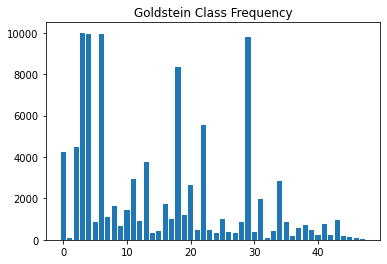

In [60]:
#plot distribution
class_counts = [0]*nr_classes
for ix in WEIS['goldclass']:
    class_counts[ix] += 1
plt.bar(range(nr_classes), class_counts)
plt.title('Goldstein Class Frequency')
plt.savefig('../goldstein_class_frequency.png')

In [36]:
#tokenized = [torch.as_tensor(x) for x in tokenized]
#tokenized = tokenized.to_numpy()
#torch.as_tensor(tokenized)

In [61]:
#from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence
y = WEIS['goldclass'].to_numpy()
#Xx = pad_sequence([embedding_glove.get_vecs_by_tokens(x) for x in tokenized], batch_first=True)
def lookup(y):
    try:
        return embedding_glove.stoi[y]
    except:
        return 0
tokenized2 = [torch.tensor([lookup(y) for y in x]) for x in tokenized]
X = pad_sequence(tokenized2, batch_first=True)

In [62]:
X.shape

torch.Size([98043, 45])

In [63]:
y[10]

6

In [64]:
from torch.utils.data import random_split, Dataset, WeightedRandomSampler, DataLoader
from sklearn.model_selection import train_test_split
# l = X.shape[0]
# X_train, X_test, X_val = random_split(X, [l*7//10, l*2//10, l-l*9//10], generator=torch.Generator().manual_seed(42))
# y_train, y_test, y_val = random_split(y, [l*7//10, l*2//10, l-l*9//10], generator=torch.Generator().manual_seed(42))

# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

print(X_train.shape)
#Define dataset for dataloader
class ClassifierDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(X_train, y_train)
val_dataset = ClassifierDataset(X_val, y_val)
test_dataset = ClassifierDataset(X_test, y_test)

torch.Size([70590, 45])


In [65]:
#Make weighted sampler, use target list
target_list = []
for _, t in train_dataset:
    target_list.append(t)

target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [66]:
#make class weight
if(is_cuda):
    class_weights = 1./torch.tensor(class_counts, dtype=torch.float).cuda()
else:
    class_weights = 1./torch.tensor(class_counts, dtype=torch.float)

class_weights_all = class_weights[target_list]
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [43]:
#SETTING PARAMETERS
EPOCHS = 3
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = 300
NUM_CLASSES = len(gold_class)
INPUT_DIM = X_train.shape[1]

In [44]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [45]:
class MulticlassClassification(nn.Module):
    def __init__(self, input_dim, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.embedding = nn.Embedding(input_dim, num_feature)

        self.layer_1 = nn.Linear(num_feature*45, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)

    def forward(self, x):
        #print(x.shape)
        print(x.shape)
        x = self.embedding(x)
        print(x.shape)
        x = x.view(BATCH_SIZE,-1)
        print(x.shape)

        x = self.layer_1(x)
        print(x.shape)
        #x = x.view(-1, 512,  45)
        #print(x.shape)
        x = self.batchnorm1(x)
        x = self.relu(x)

        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_out(x)

        return x

In [46]:
pretrained_embeddings = embedding_glove.vectors

print(pretrained_embeddings.shape)

torch.Size([2196017, 300])


In [47]:
device = torch.device("cpu")

model = MulticlassClassification(input_dim = INPUT_DIM, num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)
if(is_cuda):
    model.embedding.weight.data = pretrained_embeddings.cuda()
else:
    model.embedding.weight.data = pretrained_embeddings

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (embedding): Embedding(45, 300)
  (layer_1): Linear(in_features=13500, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=48, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [48]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)

    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)

    acc = torch.round(acc * 100)

    return acc

In [49]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [49]:
from tqdm.notebook import tqdm
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):

    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)
            #print(f'y_train_pred: {y_train_pred.shape}')

            train_loss = criterion(y_train_pred, y_train_batch.long())
            train_acc = multi_acc(y_train_pred, y_train_batch)

            train_loss.backward()
            optimizer.step()

            train_epoch_loss += train_loss.item()
            train_epoch_acc += train_acc.item()


        # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0
        val_epoch_acc = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)

            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))


    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


  0%|          | 0/3 [00:00<?, ?it/s]

torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])
torch.Size([16, 512])
torch.Size([16, 45])
torch.Size([16, 45, 300])
torch.Size([16, 13500])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-644a0f116a83>", line 20, in <module>
    optimizer.step()
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/optim/optimizer.py", line 89, in wrapper
    return func(*args, **kwargs)
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/optim/adam.py", line 108, in step
    F.adam(params_with_grad,
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/optim/_functional.py", line 84, in adam
    exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
KeyboardInterrupt

During hand

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-644a0f116a83>", line 20, in <module>
    optimizer.step()
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/optim/optimizer.py", line 89, in wrapper
    return func(*args, **kwargs)
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/optim/adam.py", line 108, in step
    F.adam(params_with_grad,
  File "/Users/liam/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/torch/optim/_functional.py", line 84, in adam
    exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
KeyboardInterrupt

During hand

TypeError: object of type 'NoneType' has no len()